In [1]:
import numpy as np
import pandas as pd
import Thermobar as pt
import matplotlib.pyplot as plt
from matplotlib import cm
import warnings as w
pd.options.display.max_columns = None

In [2]:
plt.style.use("seaborn-colorblind")
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =9
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 8.5 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 8.5 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 11 # Overall title
plt.rcParams["axes.labelsize"] = 11 # Axes labels

In [12]:
out=pt.import_excel(r'../LEPR_Wet_Stitched_April2023_Norm100Anhydrs.xlsx', sheet_name='Cpx-Liq')

myCpxs1=out['Cpxs']
myLiquids1=out['Liqs']
cpx_Glass=out['my_input']
Cpx_Glass=cpx_Glass
notinLEPR= cpx_Glass['Citation_x'].str.contains('notinLEPR')
notinKeith=(cpx_Glass['Citation_x'].str.contains('Mercer, C.N., and Johnston, A.D. (2008)'))|(cpx_Glass['Citation_x'].str.contains('Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009)'))
newMask=notinLEPR|notinKeith
OldMask=~newMask
newMask=newMask.fillna(False)

mask_1GPa=cpx_Glass['P_kbar_x']<=11
mask_1GPa=mask_1GPa.fillna(False)

Press_new=mask_1GPa&newMask
Press_new=Press_new.fillna(False)

eq_tests=pt.calculate_cpx_liq_eq_tests(liq_comps=myLiquids1, cpx_comps=myCpxs1, P=cpx_Glass['P_kbar_x'], T=cpx_Glass['T_K_x'])

sigma=1.5
Eq_Mask=((eq_tests['Delta_EnFs_Mollo13']<0.05)
        &(eq_tests['Delta_Kd_Put2008']<0.08) 
        &(eq_tests['Cation_Sum_Cpx'].between(3.95, 4.05))
         &(cpx_Glass['N_meas_Cpx']>=5)
         & (cpx_Glass['H2O_Liq']>0)
        
        )

xT=cpx_Glass['T_K_x'].loc[Press_new&Eq_Mask]
x=cpx_Glass['P_kbar_x'].loc[Press_new&Eq_Mask]
x_All=cpx_Glass['P_kbar_x'].loc[Press_new]
xT_All=cpx_Glass['T_K_x'].loc[Press_new]

## Masked Cpxs and Glasses
x_T_Mask=cpx_Glass['T_K_x'].loc[Press_new&Eq_Mask].reset_index(drop=True)
x_P_kbar_Mask=cpx_Glass['P_kbar_x'].loc[Press_new&Eq_Mask].reset_index(drop=True)

Cpx_Mask=myCpxs1.loc[Press_new&Eq_Mask].reset_index(drop=True)
Liq_Mask=myLiquids1.loc[Press_new&Eq_Mask].reset_index(drop=True)
cpx_Glass_Mask=cpx_Glass.loc[Press_new&Eq_Mask].reset_index(drop=True)

Using Fe3FeT from input file to calculate Kd Fe-Mg


C:\Users\penny\AppData\Local\Temp\ipykernel_4972\1911420318.py:8: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  notinKeith=(cpx_Glass['Citation_x'].str.contains('Mercer, C.N., and Johnston, A.D. (2008)'))|(cpx_Glass['Citation_x'].str.contains('Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009)'))
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


In [13]:
## Ones in Wang
InWang=(cpx_Glass_Mask['Citation_x'].str.contains('Berndt2005_notinLEPR')
    |
     cpx_Glass_Mask['Citation_x'].str.contains('Husen2016_notinLEPR'))
                                               
cpx_Glass_Mask_Wang=cpx_Glass_Mask.loc[~InWang].reset_index(drop=True)
Cpx_Mask_Wang=Cpx_Mask.loc[~InWang].reset_index(drop=True)
Liq_Mask_Wang=Liq_Mask.loc[~InWang].reset_index(drop=True)
x_T_Mask_Wang=x_T_Mask.loc[~InWang].reset_index(drop=True)
x_P_kbar_Mask_Wang=x_P_kbar_Mask.loc[~InWang].reset_index(drop=True)                                               

In [14]:
InJorg=(cpx_Glass_Mask['Citation_x'].str.contains('Kraw2013')
    |
     cpx_Glass_Mask['Citation_x'].str.contains('Berndt2005')   
    |
     cpx_Glass_Mask['Citation_x'].str.contains('Feig2010')   
        
    |
     cpx_Glass_Mask['Citation_x'].str.contains('Nandekar2014_notinLEPR')   

    |
     cpx_Glass_Mask['Citation_x'].str.contains('Melekhova2015_notinLEPR')   
    |        
     cpx_Glass_Mask['Citation_x'].str.contains('Ulmer2018')   
    |        
     cpx_Glass_Mask['Citation_x'].str.contains('Almeev2013')   
    |        
     cpx_Glass_Mask['Citation_x'].str.contains('Parat2014_notinLEPR')   
    |        
     cpx_Glass_Mask['Citation_x'].str.contains('Husen2016_notinLEPR')      

       
       )

cpx_Glass_Mask_Jorg=cpx_Glass_Mask.loc[~InJorg].reset_index(drop=True)
Cpx_Mask_Jorg=Cpx_Mask.loc[~InJorg].reset_index(drop=True)
Liq_Mask_Jorg=Liq_Mask.loc[~InJorg].reset_index(drop=True)
x_T_Mask_Jorg=x_T_Mask.loc[~InJorg].reset_index(drop=True)
x_P_kbar_Mask_Jorg=x_P_kbar_Mask.loc[~InJorg].reset_index(drop=True)

In [15]:
Cpx_Mask_All=Cpx_Mask.loc[(~InJorg)&(~InWang)].reset_index(drop=True)
Liq_Mask_All=Liq_Mask.loc[(~InJorg)&(~InWang)].reset_index(drop=True)
cpx_Glass_Mask_All=cpx_Glass_Mask.loc[(~InJorg)&(~InWang)].reset_index(drop=True)

x_T_Mask_All=x_T_Mask.loc[(~InJorg)&(~InWang)].reset_index(drop=True)
x_P_kbar_Mask_All=x_P_kbar_Mask.loc[(~InJorg)&(~InWang)].reset_index(drop=True)

In [16]:
Calc=pt.calculate_cpx_only_press_all_eqs(cpx_comps=Cpx_Mask_All, H2O_Liq=Liq_Mask_All['H2O_Liq'])
Calc.head()

,P_Wang21_eq1,T_Wang21_eq2,T_Jorgenson22,P_Jorgenson22,T_Petrelli20,T_Petrelli21_H2O,P_Petrelli21_H2O,T_Put_Teq32d_Peq32a,T_Put_Teq32d_Peq32b,P_Petrelli20,P_Put_Teq32d_Peq32a,P_Put_Teq32d_Peq32b,"Jd_from 0=Na, 1=Al",SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Sample_ID_Cpx,Si_Cpx_cat_6ox,Mg_Cpx_cat_6ox,Fet_Cpx_cat_6ox,Ca_Cpx_cat_6ox,Al_Cpx_cat_6ox,Na_Cpx_cat_6ox,K_Cpx_cat_6ox,Mn_Cpx_cat_6ox,Ti_Cpx_cat_6ox,Cr_Cpx_cat_6ox,oxy_renorm_factor,Al_IV_cat_6ox,Al_VI_cat_6ox,En_Simple_MgFeCa_Cpx,Fs_Simple_MgFeCa_Cpx,Wo_Simple_MgFeCa_Cpx,Cation_Sum_Cpx,Ca_CaMgFe,Lindley_Fe3_Cpx,Lindley_Fe2_Cpx,Lindley_Fe3_Cpx_prop,CrCaTs,a_cpx_En,Mgno_Cpx,Jd,CaTs,CaTi,DiHd_1996,EnFs,DiHd_2003,Di_Cpx,FeIII_Wang21,FeII_Wang21,H2O_Liq,T_Put_Teq32d_subsol_Peq32a,T_Put_Teq32d_subsol_Peq32b,P_Put_Teq32d_subsol_Peq32a,P_Put_Teq32d_subsol_Peq32b
0,3.879533,1385.469212,1369.473383,4.933744,1389.623333,1426.798889,6.428284,1489.226941,1480.283541,6.122767,7.664096,6.590308,0,50.3,0.42,5.19,8.88,0.08,16.0,18.9,0.24,0.01,0.0,367,1.860176,0.882093,0.274634,0.748895,0.226209,0.017209,0.000472,0.002506,0.011683,0.0,0.0,0.139824,0.086385,0.462890,0.144118,0.392992,4.023877,0.392992,0.047282,0.227353,0.172162,0.0,0.204960,0.762570,0.017209,0.069176,0.035324,0.644395,0.256166,0.644395,0.490338,0.047282,0.227353,2.7,1326.187932,1297.547839,5.118462,2.344919
1,5.541042,1426.941229,1397.443532,5.188796,1412.190000,1443.772222,6.031209,1507.987722,1501.144168,6.123740,8.896000,8.078961,0,52.0,0.34,4.40,8.87,0.23,16.4,17.5,0.22,0.01,0.0,368,1.910344,0.898174,0.272513,0.688842,0.190510,0.015670,0.000469,0.007157,0.009395,0.0,0.0,0.089656,0.100854,0.483012,0.146550,0.370439,3.993075,0.370439,0.000000,0.272513,0.000000,0.0,0.264537,0.767213,0.015670,0.085184,0.002236,0.601422,0.284633,0.601422,0.458619,-0.014319,0.286832,1.6,1383.035636,1366.854189,5.718969,4.209321
2,5.063847,1419.858007,1401.950995,5.433363,1421.496667,1461.685556,6.790564,1505.487751,1488.595520,6.566613,8.908918,6.888694,0,50.8,0.35,4.84,9.12,0.20,17.0,17.4,0.27,0.01,0.0,369,1.872999,0.934396,0.281206,0.687379,0.210318,0.019301,0.000470,0.006246,0.009707,0.0,0.0,0.127001,0.083316,0.491017,0.147771,0.361212,4.022022,0.361212,0.043573,0.237633,0.154950,0.0,0.259159,0.768664,0.019301,0.064015,0.031493,0.591870,0.311866,0.591870,0.452627,0.043573,0.237633,1.6,1378.254079,1349.923325,5.790275,3.136523
3,5.985267,1417.434369,1420.179851,7.111866,1430.934444,1459.927778,7.702849,1510.460785,1494.129693,7.531633,10.023037,8.064307,0,50.2,0.44,5.88,9.60,0.20,16.4,16.9,0.30,0.01,0.0,374,1.853447,0.902670,0.296417,0.668554,0.255865,0.021476,0.000471,0.006254,0.012220,0.0,0.0,0.146553,0.109312,0.483321,0.158712,0.357967,4.017374,0.357967,0.034277,0.262141,0.115637,0.0,0.266508,0.752791,0.021476,0.087837,0.029358,0.551359,0.323864,0.551359,0.412908,0.034277,0.262141,1.6,1390.120962,1364.211070,6.818974,4.393530
4,5.909472,1397.297691,1403.707214,6.913697,1417.716667,1457.903333,7.187776,1502.326684,1481.984508,7.125080,10.223782,7.768039,0,49.0,0.47,6.89,10.50,0.21,15.4,17.3,0.34,0.01,0.0,375,1.818447,0.851989,0.325874,0.687898,0.301357,0.024464,0.000473,0.006601,0.013120,0.0,0.0,0.181553,0.119804,0.456644,0.174660,0.368696,4.030223,0.368696,0.059973,0.265901,0.184037,0.0,0.240315,0.723328,0.024464,0.095340,0.043106,0.549452,0.314206,0.549452,0.395222,0.059973,0.265901,1.6,1368.459607,1335.145936,7.163400,3.987135


In [17]:
CalcLiq=pt.calculate_cpx_liq_press_all_eqs(cpx_comps=Cpx_Mask_All, liq_comps=Liq_Mask_All,
                                            H2O_Liq=Liq_Mask_All['H2O_Liq'])
CalcLiq.head()

We have reset the index on Cpx and Liq comps for the Petrelli expressions
Youve selected a P-independent function
Youve selected a T-independent function
Youve selected a T-independent function
Im normalizing using the Jorgenson method, e.g. 100 total, 2dp
Im normalizing using the Jorgenson method, e.g. 100 total, 2dp
Youve selected a P-independent function
Youve selected a T-independent function
Youve selected a T-independent function


,"P_kbar: (P_Neave17, T_Put2008_eq33)","T_K: (P_Neave17, T_Put2008_eq33)","P_kbar: (P_Neave17, T_Put2008_eq34_cpx_sat)","T_K: (P_Neave17, T_Put2008_eq34_cpx_sat)","P_kbar: (P_Put2008_eq30, T_Put2008_eq33)","T_K: (P_Put2008_eq30, T_Put2008_eq33)","P_kbar: (P_Put2008_eq31, T_Put2008_eq33)","T_K: (P_Put2008_eq31, T_Put2008_eq33)","P_kbar: (P_Put2008_eq32c, T_Put2008_eq33)","T_K: (P_Put2008_eq32c, T_Put2008_eq33)","P_kbar: (P_Put2008_eq32c, T_Put2003)","T_K: (P_Put2008_eq32c, T_Put2003)","P_kbar: (P_Put2008_eq32c, T_Put2008_eq32d)","T_K: (P_Put2008_eq32c, T_Put2008_eq32d))","P_kbar: (P_Put2008_eq32c, default spreadsheet 1st cell)","P_kbar: (P_Put2008_eq32c, default spreadsheet 2 on)","P_kbar: (P_Put2008_eq32c, T_Put2008_eq34)","T_K: (P_Put2008_eq32c, T_Put2008_eq34))",P_kbar: (P2003 P&T),T_K: (P2003 P&T),"P_kbar: (Petrelli, 2020)","T_K: (Petrelli, 2020)","P_kbar: (Jorgeson, 2022)","T_K: (Jorgeson, 2022)","T_K: (P_Put1996_eqP1, T_Put1996_eqT2)","P_kbar: (P_Put1996_eqP1, T_Put1996_eqT2)"
0,3.286774,1383.752613,3.468196,1403.935522,2.853015,1381.513759,5.341572,1394.457858,3.928279,1387.077083,7.819698,1469.001701,9.511113,1504.610431,6.607933,7.146713,5.632790,1422.961524,3.542198,1463.190975,5.298549,1384.375455,4.620689,1376.980846,1454.833594,3.915014
1,3.085978,1401.973136,3.279229,1424.006617,2.239211,1397.493766,4.976933,1412.080646,1.485561,1393.530983,5.219646,1472.143295,5.618105,1480.531920,4.063358,4.375427,2.673348,1418.537035,4.243707,1470.807790,5.768426,1417.357273,5.156706,1419.169900,1454.370265,3.660332
2,4.021323,1413.717647,4.126834,1425.346847,3.352921,1410.119985,6.452329,1426.958740,4.830457,1418.097429,7.695214,1478.408115,9.029315,1506.494459,6.649362,7.063053,5.956967,1441.813428,4.503705,1474.012611,5.743663,1414.188182,5.191811,1405.965920,1465.099469,4.662148
3,5.858916,1424.378793,6.044984,1443.814644,4.250855,1415.624124,7.066573,1431.025096,4.825058,1418.737840,7.760858,1480.544153,8.630340,1498.849050,7.003696,7.385131,5.994574,1443.359234,5.661313,1477.641249,6.824120,1426.211818,6.559458,1421.970896,1472.634124,5.780116
4,6.662773,1427.813893,6.879039,1448.565480,5.267612,1420.175502,8.172514,1436.172702,6.467734,1426.741131,9.282411,1485.997501,9.950533,1500.063222,8.540776,8.916346,7.973890,1458.449676,6.495375,1482.118136,7.315460,1425.373636,6.687587,1425.174876,1478.290852,6.895474


In [18]:
a=cpx_Glass_Mask_All['P_kbar_x']
roundedP=np.round(a / 0.2) * 0.2
#roundedP=pd.Series(np.round(cpx_Glass_Mask_All['P_kbar_x'], 1))
#roundedP = pd.Series((2 * np.round(cpx_Glass_Mask_All['P_kbar_x'] / 2, 1)))
vals=np.unique(np.sort(roundedP)) #.unique()
vals

array([ 0.4,  1. ,  1.2,  1.6,  1.8,  2. ,  3. ,  4. ,  4.2,  6. ,  7. ,
        8. ,  9. , 10. , 11. ])

In [21]:
k=0

C:\Users\penny\AppData\Local\Temp\ipykernel_4972\530847086.py:57: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "^k" (-> color='k'). The keyword argument will take precedence.
  ax0.plot(x_P_kbar_Mask_All.loc[RelevantP],
C:\Users\penny\AppData\Local\Temp\ipykernel_4972\530847086.py:61: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "^k" (-> color='k'). The keyword argument will take precedence.
  ax1.plot(x_P_kbar_Mask_All.loc[RelevantP],
C:\Users\penny\AppData\Local\Temp\ipykernel_4972\530847086.py:65: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "^k" (-> color='k'). The keyword argument will take precedence.
  ax2.plot(x_P_kbar_Mask_All.loc[RelevantP],
C:\Users\penny\AppData\Local\Temp\ipykernel_4972\530847086.py:69: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "^k" (-> color='k'). The keyword argu

P=1.0
number of Cpx=65
number studies=7
P=1.2000000000000002
number of Cpx=10
number studies=2
P=1.6
number of Cpx=60
number studies=7
P=1.8
number of Cpx=18
number studies=2
P=2.0
number of Cpx=272
number studies=44
P=4.0
number of Cpx=347
number studies=24
P=4.2
number of Cpx=45
number studies=7
P=6.0
number of Cpx=57
number studies=3
P=7.0
number of Cpx=148
number studies=14
P=8.0
number of Cpx=72
number studies=4
P=9.0
number of Cpx=213
number studies=14


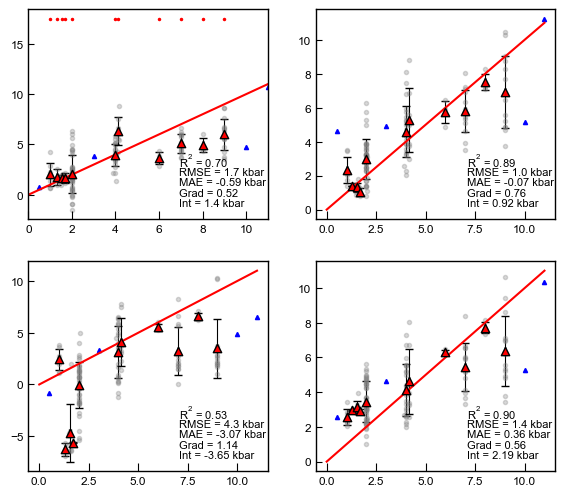

In [22]:

import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore', category=UserWarning)

    w.simplefilter('ignore')
    
    from matplotlib import patches
    

    
    num_to_Av=0
yes='V'
if yes=='T':
    print('duh')
else:

        fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2,2, figsize = (6.8,6)) # adjust dimensions of figure here
        
        ax0.set_xlim([0, 11])





        ## 1 to 1 lines for each plot
        ax0.plot([0, 11], [0, 11], '-r')
        ax1.plot([0, 11], [0, 11], '-r')
        ax2.plot([0, 11], [0, 11], '-r')
        ax3.plot([0, 11], [0, 11], '-r')



        ## Plotting all experiments

        j=0


        ax0_x=np.empty(len(vals))
        ax0_y=np.empty(len(vals))
        ax1_x=np.empty(len(vals))
        ax1_y=np.empty(len(vals))
        ax2_x=np.empty(len(vals))
        ax2_y=np.empty(len(vals))
        ax3_x=np.empty(len(vals))
        ax3_y=np.empty(len(vals))
        P=np.empty([len(vals)], 'float')
        for press in vals:

            RelevantP=(roundedP==press) #P[j]) #&  (cpx_Glass_Mask_All['P_kbar_x']>P[j]+0.1)    
            
            Nanalys=sum(cpx_Glass_Mask_All['N_meas_Cpx'].loc[RelevantP])
            N_Exp=len(cpx_Glass_Mask_All['Experiment_x'].loc[RelevantP].unique())
            
            Keep=(Nanalys>=num_to_Av)&(N_Exp>1)
            if Keep is False:
                #print('Not enough P='+str(press))
                ax0.plot(x_P_kbar_Mask_All.loc[RelevantP],
                    Calc['P_Wang21_eq1'].loc[RelevantP], 
                 '^k', color='blue', alpha=1, zorder=0, ms=3)

                ax1.plot(x_P_kbar_Mask_All.loc[RelevantP],
                    Calc['P_Jorgenson22'].loc[RelevantP], 
                 '^k', color='blue', alpha=1, zorder=0, ms=3)

                ax2.plot(x_P_kbar_Mask_All.loc[RelevantP],
                    CalcLiq['P_kbar: (P_Neave17, T_Put2008_eq33)'].loc[RelevantP], 
                 '^k', color='blue', alpha=1, zorder=0, ms=3)

                ax3.plot(x_P_kbar_Mask_All.loc[RelevantP],
                    CalcLiq['P_kbar: (Jorgeson, 2022)'].loc[RelevantP], 
                 '^k', color='blue', alpha=1, zorder=0, ms=3)

                ax0_x[j]=np.nan
                ax0_y[j]=np.nan
                ax1_x[j]=np.nan
                ax1_y[j]=np.nan
                ax2_x[j]=np.nan
                ax2_y[j]=np.nan
                ax3_x[j]=np.nan
                ax3_y[j]=np.nan
            else:
                print('P='+str(press))
                print('number of Cpx='+str((Nanalys)))
                print('number studies='+str(sum(RelevantP)))
                #Plotting dots for each datapoint in a given bin on all 4 subplots

                msl=3


            # Plotting the money shot of the errorbar
                ax0.errorbar(np.nanmean(x_P_kbar_Mask_All.loc[RelevantP]),
                        np.nanmean(Calc['P_Wang21_eq1'].loc[RelevantP]),
                         xerr=np.nanstd(x_P_kbar_Mask_All.loc[RelevantP]), 
                         yerr=np.nanstd(Calc['P_Wang21_eq1'].loc[RelevantP]),capsize=3,
                     fmt='^', ecolor='k', elinewidth=0.8, mfc='cyan', ms=1, mec='k', zorder=0)

                ax0_x[j]=np.nanmean(x_P_kbar_Mask_All.loc[RelevantP])
                ax0_y[j]=np.nanmean(Calc['P_Wang21_eq1'].loc[RelevantP])

                ax1.errorbar(np.nanmean(x_P_kbar_Mask_All.loc[RelevantP]),
                            np.nanmean(Calc['P_Jorgenson22'].loc[RelevantP]),
                             xerr=np.nanstd(x_P_kbar_Mask_All.loc[RelevantP]), 
                             yerr=np.nanstd(Calc['P_Jorgenson22'].loc[RelevantP]),capsize=3,
                         fmt='^', ecolor='k', elinewidth=0.8, mfc='cyan', ms=1, mec='k', zorder=0)

                ax1_x[j]=np.nanmean(x_P_kbar_Mask_All.loc[RelevantP])
                ax1_y[j]=np.nanmean(Calc['P_Jorgenson22'].loc[RelevantP])

                ax2.errorbar(np.nanmean(x_P_kbar_Mask_All.loc[RelevantP]),
                            np.nanmean(CalcLiq['P_kbar: (P_Neave17, T_Put2008_eq33)'].loc[RelevantP]),
                             xerr=np.nanstd(x_P_kbar_Mask_All.loc[RelevantP]), 
                             yerr=np.nanstd(CalcLiq['P_kbar: (P_Neave17, T_Put2008_eq33)'].loc[RelevantP]),capsize=3,
                         fmt='^', ecolor='k', elinewidth=0.8, mfc='cyan', ms=1, mec='k', zorder=0)

                ax2_x[j]=np.nanmean(x_P_kbar_Mask_All.loc[RelevantP])
                ax2_y[j]=np.nanmean(CalcLiq['P_kbar: (P_Neave17, T_Put2008_eq33)'].loc[RelevantP])

                ax3.errorbar(np.nanmean(x_P_kbar_Mask_All.loc[RelevantP]),
                            np.nanmean(CalcLiq['P_kbar: (Jorgeson, 2022)'].loc[RelevantP]),
                             xerr=np.nanstd(x_P_kbar_Mask_All.loc[RelevantP]), 
                             yerr=np.nanstd(CalcLiq['P_kbar: (Jorgeson, 2022)'].loc[RelevantP]),capsize=3,
                         fmt='^', ecolor='k', elinewidth=0.8, mfc='cyan', ms=1, mec='k', zorder=0)

                ax3_x[j]=np.nanmean(x_P_kbar_Mask_All.loc[RelevantP])
                ax3_y[j]=np.nanmean(CalcLiq['P_kbar: (Jorgeson, 2022)'].loc[RelevantP])



                # Symbol by size of number of  averages
                s=ax0.scatter(np.nanmean(x_P_kbar_Mask_All.loc[RelevantP]),
                            np.nanmean(Calc['P_Wang21_eq1'].loc[RelevantP]),
                              marker='^',
                            cmap='hot', ec='k', 
                              c='red', 
                                vmin = 5, vmax = 44,  zorder=100)  

                ax0.plot(np.nanmean(x_P_kbar_Mask_All.loc[RelevantP]),
                            17.5+0*np.nanmean(Calc['P_Wang21_eq1'].loc[RelevantP]),
                            '.r', ms=3)
                s=ax1.scatter(np.nanmean(x_P_kbar_Mask_All.loc[RelevantP]),
                            np.nanmean(Calc['P_Jorgenson22'].loc[RelevantP]),
                               marker='^',
                             cmap='hot', ec='k', 
                              c='red',
                               vmin = 5, vmax = 44,   zorder=100)    
                s=ax2.scatter(np.nanmean(x_P_kbar_Mask_All.loc[RelevantP]),
                            np.nanmean(CalcLiq['P_kbar: (P_Neave17, T_Put2008_eq33)'].loc[RelevantP]),
                             marker='^',
                              cmap='hot', ec='k', 
                              c='red',
                            vmin = 5, vmax = 44,      zorder=100)      
                s=ax3.scatter(np.nanmean(x_P_kbar_Mask_All.loc[RelevantP]),
                            np.nanmean(CalcLiq['P_kbar: (Jorgeson, 2022)'].loc[RelevantP]),
                            marker='^',
                              cmap='hot', ec='k', 
                              c='red',
            vmin = 5, vmax = 44, zorder=100)

                ax0.plot(x_P_kbar_Mask_All.loc[RelevantP],
                    Calc['P_Wang21_eq1'].loc[RelevantP], 
                 '.', color='grey', alpha=0.3, zorder=0)




                ax1.plot(x_P_kbar_Mask_All.loc[RelevantP],
                    Calc['P_Jorgenson22'].loc[RelevantP], 
                 '.', color='grey', alpha=0.3, zorder=0)

                ax2.plot(x_P_kbar_Mask_All.loc[RelevantP],
                    CalcLiq['P_kbar: (P_Neave17, T_Put2008_eq33)'].loc[RelevantP], 
                 '.', color='grey', alpha=0.3, zorder=0)

                ax3.plot(x_P_kbar_Mask_All.loc[RelevantP],
                    CalcLiq['P_kbar: (Jorgeson, 2022)'].loc[RelevantP], 
                 '.', color='grey', alpha=0.3, zorder=0)

            j=j+1




        # Adding statistics thro averages. 
        ax0_stats=pt.calculate_R2_Tukey(pd.Series(ax0_x), pd.Series(ax0_y)) 
        ax0_stats_noround=pt.calculate_R2(pd.Series(ax0_x), pd.Series(ax0_y))


        ax0.annotate("R$^{2}$ = "+str(ax0_stats['R$^{2}$']),
                               xy=(0.63, 0.25), xycoords="axes fraction", fontsize=8)
        ax0.annotate("RMSE = "+str(ax0_stats['RMSE_num']) +" kbar",
                                   xy=(0.63, 0.21), xycoords="axes fraction", fontsize=8)
        ax0.annotate("MAE = "+str(ax0_stats['Mean Error']) +" kbar",
                                   xy=(0.63, 0.16), xycoords="axes fraction", fontsize=8)
        ax0.annotate("Grad = "+str(ax0_stats['Grad']),
                                   xy=(0.63, 0.11), xycoords="axes fraction", fontsize=8)
        ax0.annotate("Int = "+str(ax0_stats['Int']) +" kbar",
                                   xy=(0.63, 0.06), xycoords="axes fraction", fontsize=8)

        ax1_stats=pt.calculate_R2_Tukey(pd.Series(ax1_x), pd.Series(ax1_y)) 
        ax1_stats_noround=pt.calculate_R2(pd.Series(ax1_x), pd.Series(ax1_y))

        ax1.annotate("R$^{2}$ = "+str(ax1_stats['R$^{2}$']),
                               xy=(0.63, 0.25), xycoords="axes fraction", fontsize=8)
        ax1.annotate("RMSE = "+str(ax1_stats['RMSE_num']) +" kbar",
                                   xy=(0.63, 0.21), xycoords="axes fraction", fontsize=8)
        ax1.annotate("MAE = "+str(ax1_stats['Mean Error']) +" kbar",
                                   xy=(0.63, 0.16), xycoords="axes fraction", fontsize=8)
        ax1.annotate("Grad = "+str(ax1_stats['Grad']),
                                   xy=(0.63, 0.11), xycoords="axes fraction", fontsize=8)
        ax1.annotate("Int = "+str(ax1_stats['Int']) +" kbar",
                                   xy=(0.63, 0.06), xycoords="axes fraction", fontsize=8)
        
        # Put2008 Neave
        ax2_stats=pt.calculate_R2_Tukey(pd.Series(ax2_x), pd.Series(ax2_y)) 
        ax2_stats_noround=pt.calculate_R2(pd.Series(ax2_x), pd.Series(ax2_y))


        ax2.annotate("R$^{2}$ = "+str(ax2_stats['R$^{2}$']),
                               xy=(0.63, 0.25), xycoords="axes fraction", fontsize=8)
        ax2.annotate("RMSE = "+str(ax2_stats['RMSE_num']) +" kbar",
                                   xy=(0.63, 0.21), xycoords="axes fraction", fontsize=8)
        ax2.annotate("MAE = "+str(ax2_stats['Mean Error']) +" kbar",
                                   xy=(0.63, 0.16), xycoords="axes fraction", fontsize=8)
        ax2.annotate("Grad = "+str(ax2_stats['Grad']),
                                   xy=(0.63, 0.11), xycoords="axes fraction", fontsize=8)
        ax2.annotate("Int = "+str(ax2_stats['Int']) +" kbar",
                                   xy=(0.63, 0.06), xycoords="axes fraction", fontsize=8)

        # Jorgenson Cpx-liq
        ax3_stats=pt.calculate_R2_Tukey(pd.Series(ax3_x), pd.Series(ax3_y)) 
        ax3_stats_noround=pt.calculate_R2(pd.Series(ax3_x), pd.Series(ax3_y))


        ax3.annotate("R$^{2}$ = "+str(ax3_stats['R$^{2}$']),
                               xy=(0.63, 0.25), xycoords="axes fraction", fontsize=8)
        ax3.annotate("RMSE = "+str(ax3_stats['RMSE_num']) +" kbar",
                                   xy=(0.63, 0.21), xycoords="axes fraction", fontsize=8)
        ax3.annotate("MAE = "+str(ax3_stats['Mean Error']) +" kbar",
                                   xy=(0.63, 0.16), xycoords="axes fraction", fontsize=8)
        ax3.annotate("Grad = "+str(ax3_stats['Grad']),
                                   xy=(0.63, 0.11), xycoords="axes fraction", fontsize=8)
        ax3.annotate("Int = "+str(ax3_stats['Int']) +" kbar",
                                   xy=(0.63, 0.06), xycoords="axes fraction", fontsize=8)
        
        k=k+1
